In [55]:
from traj2sim import *
import math
from mpl_toolkits import mplot3d
%matplotlib widget
import numpy as np
import matplotlib.pyplot as plt

from alive_progress import alive_bar

R = 5
r = 2
    
def torus_point(theta, phi):
    return [(r*math.cos(theta)+R)*math.cos(phi), (r*math.cos(theta)+R)*math.sin(phi), r*math.sin(theta)]

n = 2
a = np.random.randn(n,n)
b = np.random.randn(n,n)

def random_trig(theta, phi):
    return sum([sum([a[i,j]*np.cos((i+1)*theta)*np.sin((j+1)*phi) for i in range(n)]) for j in range(n)])

def trig_vf(tp):
    phi = tp[1]
    theta = tp[0]
    return np.array([sum([sum([-a[i,j]*(i+1)*np.sin((i+1)*theta)*np.sin((j+1)*phi) for i in range(n)]) for j in range(n)]),
            sum([sum([a[i,j]*np.cos((i+1)*theta)*(j+1)*np.cos((j+1)*phi) for i in range(n)]) for j in range(n)])])


In [73]:
def flow(init_tps):
    dt = 0.02
    num_steps = 50

    tps = np.empty((num_steps + 1, 2))  
    tps[0] = init_tps

    for i in range(num_steps):
        tps[i + 1] = tps[i] + trig_vf(tps[i]) * dt

    xyzs = np.empty((num_steps + 1, 4))  
    for i in range(num_steps+1):
        xyzs[i][0] = dt*i
        xyzs[i][1:] = torus_point(tps[i][0], tps[i][1])

    xyz_coords = np.empty((num_steps+1, 3))
    for i in range(num_steps+1):
        xyz_coords[i] = xyzs[i][1:]
    return xyzs, xyz_coords


N = 64
sqrt_N = 8.00
xyzs = [0 for i in range(N)]
xyz_coords = [0 for i in range(N)]
for i in range(N):
    #xyzs[i], xyz_coords[i] = flow((2*math.pi*int(i/sqrt_N)/8.0, 2*math.pi*(i%int(sqrt_N))/sqrt_N))
    xyzs[xyz_coords[i] = flow((2*math.pi*int(i/sqrt_N)/sqrt_N, 2*math.pi*(i%int(sqrt_N))/sqrt_N))[1]

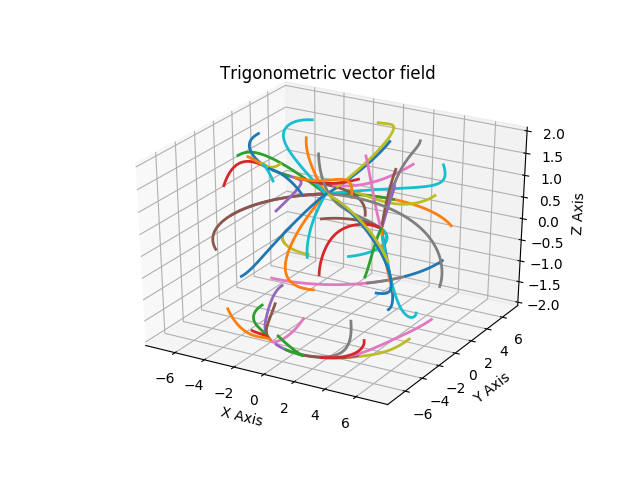

[-3.18453028  1.07554487]


In [74]:
ax = plt.figure().add_subplot(projection='3d')

for i in range(N):
    ax.plot(*xyz_coords[i].T, lw=2)
ax.set_xlabel("X Axis")
ax.set_ylabel("Y Axis")
ax.set_zlabel("Z Axis")
ax.set_title("Trigonometric vector field")

plt.show()
print(trig_vf(tps[-1]))

In [75]:
traj_list = xyzs
t2s = Traj2Sim()
t2s.set_trajectories(traj_list[:-2])
t2s.dist = 'mssd'

t2s.compute_mssd(verbose=False)
t2s.compute_sim(verbose=False)

print('Persistence intervals:')
pers = t2s.simplex_tree.persistence(homology_coeff_field=2, min_persistence=-0.1)
pers.sort(key=lambda x: x[1][0]-x[1][1])
print(pers[:10])

gudhi.plot_persistence_diagram(pers[:20])


|                                        | ▁▃▅ 0/1953 [0%] in 0s (0.0/s, et

TypeError: object of type 'int' has no len()

Persistence intervals:
[(0, (0.0, inf)), (1, (0.779, 4.929)), (1, (0.968, 3.35)), (2, (1.641, 3.646)), (0, (0.0, 0.964)), (0, (0.0, 0.964)), (0, (0.0, 0.964)), (0, (0.0, 0.964)), (0, (0.0, 0.964)), (0, (0.0, 0.964))]
17676660


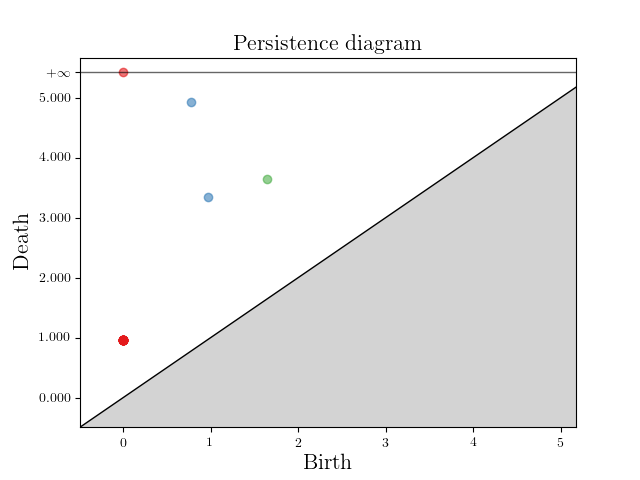

In [5]:
verbose=False
for i in range(len(t2s.trajectories)):
    for j in range(i+1, len(t2s.trajectories)):
        #self.MSSD[i][j-i-1].set_trajectories(self.trajectories[i], self.trajectories[j])
        #t2s.dist_mat[i,j] = t2s.MSSD[i][j-i-1].inf_metric()
        t2s.dist_mat[i,j] = t2s.MSSD[i][j-i-1].t_thresh_metric(t_thresh=10)
        t2s.dist_mat[j,i] = t2s.dist_mat[i,j]
        if verbose == True:
            print('Custom distance between ' + str(i) + ', ' + str(j) + ': ' + str(t2s.dist_mat[i,j]))
t2s.compute_sim(verbose=False)

print('Persistence intervals:')
pers = t2s.simplex_tree.persistence(homology_coeff_field=2, min_persistence=-0.1)
pers.sort(key=lambda x: x[1][0]-x[1][1])
print(pers[:10])

gudhi.plot_persistence_diagram(pers[:20])

print(t2s.simplex_tree.num_simplices()) 
